### <center>Ryszard Pręcikowski 401433</center>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint
from math import factorial, sin, cos, asin

# Zadanie 1. Znajdź maszynowe epsilon
### Maszynowy epsilon - najmniejsza liczba a, taką że fl(1 + a) > 1

In [2]:
def find_epsilon():
    a = 1.0
    while 1.0 + a > 1.0:
        a /= 2.0
        
    return 2*a

find_epsilon()

2.220446049250313e-16

# Zadanie 2. Problem ewaluacji funkcji sin(x).
## Propagacja błędu danych wejściowych, tj. błąd wartości funkcji ze względu na zakłócenie h w argumencie x.


- Oceń błąd bezwzględny przy ewaluacji sin(x).
- Oceń błąd względny przy ewaluacji sin(x).
- Oceń uwarunkowanie dla tego problemu.
- Dla jakich wartości argumentu x problem jest bardzo czuły?

In [3]:
def absolute_error(x, e):
    return sin(x) - sin(x * (1 + e))

def relative_error(x, e):
    return absolute_error(x, e) / sin(x)

In [4]:
print(absolute_error(1, 10**-5))
print(relative_error(1, 10**-5))

-5.4029809850586474e-06
-6.420876159255949e-06


In [5]:
def condition(x):
    return abs(x*cos(x)/sin(x))

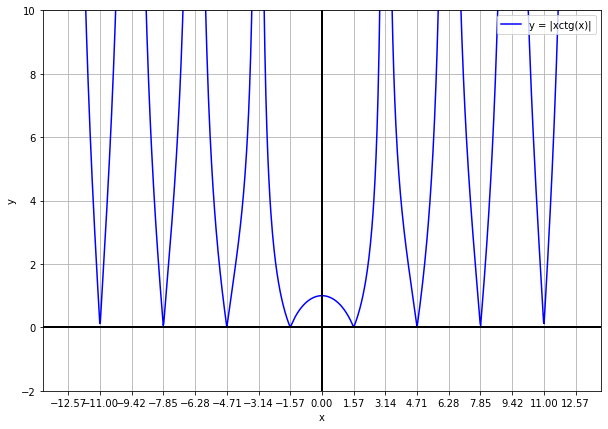

In [6]:
n = 4
x = np.linspace (-n * np.pi , n * np.pi , 1000)
y = np.abs(x * np.cos(x))
y = np.abs(x * (np.cos(x) / np.sin(x)))

fig , ax = plt.subplots(figsize = (10,7))
ax.plot (x , y, color ="blue", label ="y = |xctg(x)|")

ax.set_xlabel ("x")
ax.set_ylabel ("y")
ax.grid(True)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.axhline(y=0, lw=2, color='k')
ax.axvline(x=0, lw=2, color='k')
ax.plot()
ax.legend(loc= 1)
ax.set_ylim(-2,10)

plt.show ()

# Zadanie 3. Rozwinięcie funkcji sinus w szereg Taylora jest równe
## <center> $sin(x) = x - \frac 1 {3!} x^3 + \frac 1 {5!} x^5 - \frac 1 {7!} x^7 + \cdots$ </center>
### - Jakie są błędy progresywny (ang. forward error ) i wsteczny (ang. backward error) jeśli przybliżamy funkcję sinus biorąc tylko pierwszy człon rozwinięcia, tj. $sin(x) ≈ x$, dla x = 0.1, 0.5 i 1.0 ?
### - Jakie są błędy progresywny i wsteczny jeśli przybliżamy funkcję sinus biorąc pierwsze dwa człony rozwinięcia, tj. $sin(x) ≈ x−\frac{x^3}6$, dla x = 0.1, 0.5 i 1.0 

In [7]:
def my_sin(x, n):
    res = 0
    sign = 1
    for i in range(1, 1+2*n, 2):
        res += sign * x**i / factorial(i)
        sign *= -1
    return res

def calculate_errors(n, x_values):
    def forward_error(x):
        return abs(my_sin(x, n) - sin(x))
    
    def backward_error(x):
        return abs(x - asin(my_sin(x, n)))
    forward_errors = [forward_error(x) for x in x_values]
    backward_errors = [backward_error(x) for x in x_values]
    
    return forward_errors, backward_errors

In [8]:
pprint(calculate_errors(1, [0.1, 0.5, 1.0]))

([0.0001665833531718508, 0.020574461395796995, 0.1585290151921035],
 [0.00016742116155979425, 0.023598775598298927, 0.5707963267948966])


In [9]:
pprint(calculate_errors(2, [0.1, 0.5, 1.0]))

([8.331349481138783e-08, 0.0002588719375363202, 0.008137651474563135],
 [8.373180472587283e-08, 0.0002949592406357171, 0.01488921666225429])


In [10]:
def calculate_errors_table(n, x_values, accuracy = 8):
    forward, backward = calculate_errors(n, x_values)
    res = ["x, sin(x), computed sin, forward, arcsin(computed sin), backward"]
    
    for i in range(len(x_values)):
        x = x_values[i]
        tmp = [x, sin(x), my_sin(x, n), forward[i], asin(my_sin(x, n)), backward[i]]
        res.append([round(a, accuracy) for a in tmp])
    return res      

In [11]:
pprint(calculate_errors_table(1, [0.1, 0.5, 1.0]))

['x, sin(x), computed sin, forward, arcsin(computed sin), backward',
 [0.1, 0.09983342, 0.1, 0.00016658, 0.10016742, 0.00016742],
 [0.5, 0.47942554, 0.5, 0.02057446, 0.52359878, 0.02359878],
 [1.0, 0.84147098, 1.0, 0.15852902, 1.57079633, 0.57079633]]


In [12]:
pprint(calculate_errors_table(2, [0.1, 0.5, 1.0]))

['x, sin(x), computed sin, forward, arcsin(computed sin), backward',
 [0.1, 0.09983342, 0.09983333, 8e-08, 0.09999992, 8e-08],
 [0.5, 0.47942554, 0.47916667, 0.00025887, 0.49970504, 0.00029496],
 [1.0, 0.84147098, 0.83333333, 0.00813765, 0.98511078, 0.01488922]]


# Zadanie 4. Podaj własny przykład algorytmu niestablinego numerycznie.
### - Zademonstruj wersję niestabilną i pokaż, że działa źle.
### - Wyjaśnij, dlaczego działa źle.
### - Zademonstruj wersję stabilną.

In [13]:
def unstable(n):
    if n == 0:
        return 1
    if n == 1:
        return 1/7
    
    return 15/7 * unstable(n-1) - 2/7*unstable(n-2)

In [14]:
for i in range(25):
    print("f("+str(i)+") =", unstable(i))

f(0) = 1
f(1) = 0.14285714285714285
f(2) = 0.02040816326530609
f(3) = 0.0029154518950436636
f(4) = 0.0004164931278632534
f(5) = 5.9499018265924764e-05
f(6) = 8.49985975176639e-06
f(7) = 1.214265677806617e-06
f(8) = 1.734665233666394e-07
f(9) = 2.478092784090812e-08
f(10) = 3.5401244114775782e-09
f(11) = 5.057157843353467e-10
f(12) = 7.221256315357762e-11
f(13) = 1.0250982661853007e-11
f(14) = 1.3342305172342688e-12
f(15) = -6.978679502742598e-14
f(16) = -5.307518514114181e-13
f(17) = -1.1173863115880599e-12
f(18) = -2.242755852999723e-12
f(19) = -4.486652167402817e-12
f(20) = -8.973467257863259e-12
f(21) = -1.7946957790449035e-11
f(22) = -3.589391890585843e-11
f(23) = -7.17878382867112e-11
f(24) = -1.4357567664127872e-10


In [15]:
def exact(n):
    return 1/(7**n)

In [16]:
def diff_function(x):
    return abs(unstable(x) - exact(x))

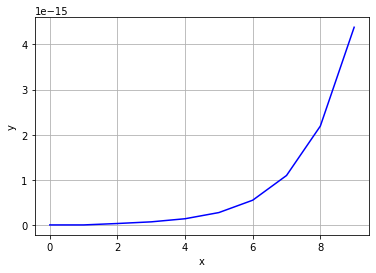

In [17]:
n = 10
x = np.linspace (0, n -1, n)

y = np.fromfunction(np.vectorize(diff_function), x.shape)


fig , ax = plt.subplots()
ax.plot (x , y, color ="blue")

ax.set_xlabel ("x")
ax.set_ylabel ("y")
ax.grid(True)

ax.plot()

plt.show ()